<a href="https://colab.research.google.com/github/JaiderSantos/metodos1_JaiderSantos_NicolasGomez/blob/main/Parcial3/Casino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import permutations
from itertools import combinations
from itertools import combinations_with_replacement

from itertools import product

In [2]:
def GetStates(State, N):
    CStates = list(combinations_with_replacement(State, N))
    Permu = []

    for it in CStates:
        p = list(permutations(it, N))
        for i in p:
            if i not in Permu:
                Permu.append(i)

    CStates = np.array(Permu)
    return CStates

def GetProb(T, E, Obs, State, Prior):
    n = len(Obs)
    p = 1.
    # Probabilidad a priori
    p *= Prior[State[0]]

    for i in range(n - 1):  # El ultimo no va a ningun lado
        p *= T[State[i + 1], State[i]]

    # Map observation strings to numerical indices
    obs_map = {'S': 0, 'C': 1}  # Assuming 'S' maps to 0 and 'C' maps to 1 in E
    obs_indices = [obs_map[obs] for obs in Obs]

    for i in range(n):
        # Use numerical indices to access E
        p *= E[obs_indices[i], State[i]]

    return p



In [3]:
# Estados
Estados = np.array([0, 1])
legend = {0: 'J', 1: 'B'}
# Prior
prior = np.array([0.2, 0.8])
# Muestra
Obs = np.array(['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C'])
# Transmision Emision
T = np.array([[0.8, 0.2],
              [0.2, 0.8]])
E = np.array([[0.5, 0.9],
              [0.5, 0.1]])
N = len(Obs)





In [4]:
Ocultas = GetStates(Estados, N)
Probabilidades = np.zeros(Ocultas.shape[0])
for i in range(Probabilidades.shape[0]):
    Probabilidades[i] = GetProb(T, E, Obs, Ocultas[i], prior)

In [5]:
Ocultas_str = np.array([])  # Array vacío para almacenar las secuencias finales
for secuencia in Ocultas:
    sec_final = ''
    for letra in secuencia:
        sec_final += legend[letra]  # Convierte según el diccionario legend
    Ocultas_str = np.append(Ocultas_str, sec_final)  # Reasigna el array con el nuevo valor

In [29]:
#Normalizamos las probas
Probabilidades = Probabilidades / np.sum(Probabilidades)
#sacamos la convinación más probable.
maxima = np.where(Probabilidades == np.max(Probabilidades))[0][0]
print(f'La convinación más probable es: {Ocultas_str[maxima]} con un {round(Probabilidades[maxima]*100, 2)}%')

La convinación más probable es: BJJJJJJJ con un 33.46%


In [38]:
df_casino = pd.DataFrame()
df_casino['Ocultas'] = Ocultas_str
df_casino['Probabilidades'] = Probabilidades
df_casino = df_casino.sort_values(by='Probabilidades', ascending=False).reset_index(drop=True)


In [39]:
df_casino

,Ocultas,Probabilidades
0,BJJJJJJJ,3.345602e-01
1,JJJJJJJJ,1.858668e-01
2,BBJJJJJJ,6.691204e-02
3,BJJJBJJJ,3.763802e-02
4,BJJJJJBJ,3.763802e-02
...,...,...
251,JBJBJBJJ,3.630210e-07
252,JBBJJBJB,2.904168e-07
253,JJBBJBJB,2.904168e-07
254,JBBBJBJB,5.808337e-08


In [40]:
#tenemos que sacar el 20% de la suma acumulada
#declaramos las acumuladas
df_casino['proba_acumulada'] = df_casino['Probabilidades'].cumsum()

In [ ]:
df_casino

In [43]:
top_20 = df_casino[df_casino['proba_acumulada'] <= 0.2]
top_20

,Ocultas,Probabilidades,proba_acumulada


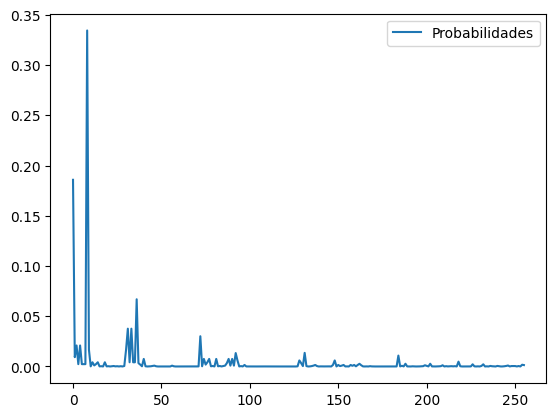

In [49]:
#Plotear

plt.plot(Probabilidades, label='Probabilidades')
plt.legend()
plt.show()